# **Part 1: Differential Calculus - The "Microscope" for Observing Change**
# **第一部分：微分 - 观察变化的“显微镜”**

Hello, students! Welcome to the first stop of 'From Code to the Cosmos: A Python Calculus Exploration Handbook for CS Students'. Here, we will explore the mysteries of differential calculus together and learn how to understand and apply this powerful mathematical tool from a coding perspective.

大家好！欢迎来到“从代码到宇宙：CS学生的Python微积分探索手册”的第一站。在这里，我们将一起探索微分学的奥秘，并学习如何从编程的视角来理解和应用这个强大的数学工具。

### **1.1 Derivative: Capturing the Instantaneous Rate of Change**
### **1.1 导数：捕捉瞬时变化率**

#### **Example 1: How to precisely define "instantaneous" velocity?**
#### **示例 1：如何精确定义“瞬时”速度？**

  * **Real-life scenario:** You are driving a car, and we have a record of the distance traveled, `P(t)`, over a period of time. It's easy to calculate the **average velocity** between any two points, but how do we accurately describe the speedometer reading at a specific "instant" (e.g., at `t=3`)?
  * **生活场景：** 你正在开车，我们有一段时间内行驶距离 `P(t)` 的记录。计算任意两点之间的**平均速度**很容易，但我们如何精确描述在特定“瞬间”（例如 `t=3` 时）的速度表读数呢？

---

#### **Exploration Step 1: Posing Questions and Visualization**
#### **探索第一步：提出问题与可视化**

**Question**: What exactly is "instantaneous velocity"? And how is it related to "average velocity"?
**问题**：究竟什么是“瞬时速度”？它和“平均速度”有什么关系？

First, let's visualize the problem. Assume the position function is $$P(t) = 5t^2 + 20t$$.
首先，让我们将问题可视化。假设位置函数是 $$P(t) = 5t^2 + 20t$$。

We'll use `matplotlib` to plot this curve and get an intuitive feel for how the position changes over time.
我们将使用 `matplotlib` 来绘制这条曲线，直观感受位置如何随时间变化。

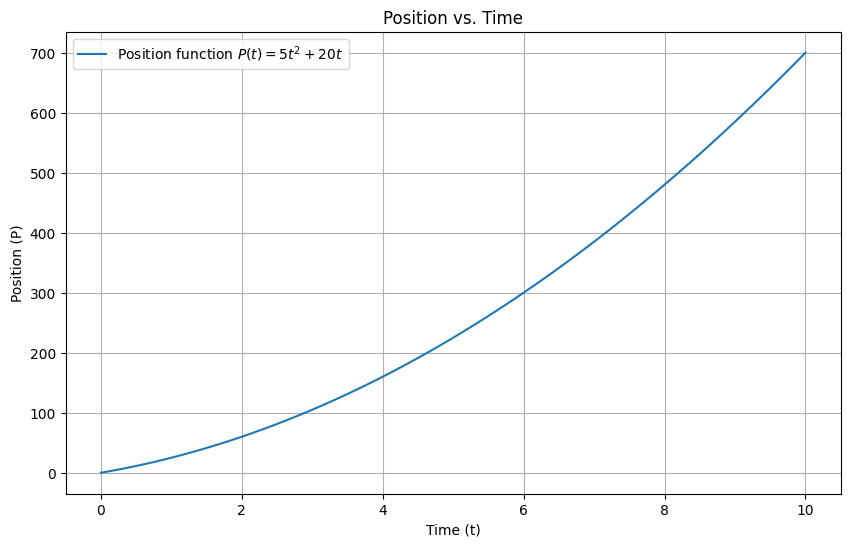

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the position function
# 1. 定义位置函数
def position(t):
    return 5 * t**2 + 20 * t

# 2. Generate time data points
# 2. 生成时间数据点
t_points = np.linspace(0, 10, 100)
p_points = position(t_points)

# 3. Plot Position-Time graph
# 3. 绘制位置-时间图像
plt.figure(figsize=(10, 6))
plt.plot(t_points, p_points, label='Position function $P(t) = 5t^2 + 20t$')
plt.title('Position vs. Time')
plt.xlabel('Time (t)')
plt.ylabel('Position (P)')
plt.grid(True)
plt.legend()
plt.show()
plt.close() # Add this line to prevent duplicate plots

---

#### **Exploration Step 2: Hands-on Experiment, Approaching the Tangent from the Secant**
#### **探索第二步：动手实验，从割线到切线**

We know that **average velocity = change in position / change in time**. Graphically, this is the **slope of the secant line** connecting two points on the position curve.
我们知道 **平均速度 = 位置变化量 / 时间变化量**。在图形上，这就是连接位置曲线上两点的**割线的斜率**。

Now, let's do an interactive experiment. We will fix one point at `t=3` and let another point `t + Δt` get infinitely close to it. Observe the fascinating changes in the secant line connecting these two points!
现在，让我们来做一个互动实验。我们将固定一点在 `t=3`，让另一点 `t + Δt` 无限地靠近它。观察连接这两点的割线发生的奇妙变化！

**Instructions:** Drag the slider below to decrease the value of `Δt` and observe the change in the secant line and the calculated average velocity.
**操作说明：** 拖动下面的滑块，减小 `Δt` 的值，观察割线和计算出的平均速度的变化。

In [ ]:
from ipywidgets import interact, FloatSlider

t0 = 3

def plot_secant(delta_t):
    # Calculate the coordinates of the two points
    # 计算两个点的坐标
    p0 = position(t0)
    t1 = t0 + delta_t
    p1 = position(t1)
    
    # Calculate the average velocity (slope of the secant line)
    # 计算平均速度（割线的斜率）
    average_velocity = (p1 - p0) / delta_t
    
    # Plot the base graph
    # 绘制基础图像
    fig = plt.figure(figsize=(10, 6))
    plt.plot(t_points, p_points, label='Position function $P(t)$ ')
    
    # Plot the secant line
    # 绘制割线
    plt.plot([t0, t1], [p0, p1], 'r-o', label=f'Secant line (Δt={delta_t:.4f})')
    
    # Plot the tangent line (theoretical value for comparison)
    # 绘制切线（理论值用于比较）
    tangent_slope = 10 * t0 + 20 # We will learn later that this is the instantaneous velocity at t=3
    tangent_line = tangent_slope * (t_points - t0) + p0
    plt.plot(t_points, tangent_line, 'g--', label='Tangent at t=3 (theoretical)')
    
    plt.title(f'As Δt → 0, the secant line approaches the tangent line ')
    plt.xlabel('Time (t)')
    plt.ylabel('Position (P)')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, position(10))
    plt.show()
    plt.close(fig) # Add this line to prevent duplicate plots
    
    print(f"When Δt = {delta_t:.4f}, the average velocity from t=3 to t={t1:.4f} is: {average_velocity:.4f} km/h")
    print(f"(当 Δt = {delta_t:.4f} 时, 从 t=3 到 t={t1:.4f} 的平均速度是: {average_velocity:.4f} km/h)")

# Create an interactive slider
# 创建一个交互式滑块
interact(plot_secant, delta_t=FloatSlider(min=0.0001, max=2.0, step=0.01, value=2.0, description='Value of Δt (Δt 的值)'));

interactive(children=(FloatSlider(value=2.0, description='Value of Δt (Δt 的值)', max=2.0, min=0.0001, step=0.01…

---

#### **Exploration Step 3: Abstracting the Definition**
#### **探索第三步：抽象定义**

**Aha Moment!**
**灵光一现！**

Through the experiment, we discovered that:
通过实验，我们发现：
1.  Graphically, as `Δt` approaches 0, the limit of the **secant line** is the **tangent line**.
    1.  图形上，当 `Δt` 趋近于 0 时，**割线**的极限是**切线**。
2.  Numerically, as `Δt` approaches 0, the limit of the **average velocity** is a specific value (50 km/h in our example).
    2.  数值上，当 `Δt` 趋近于 0 时，**平均速度**的极限是一个特定的值（在我们的例子中是 50 km/h）。

This limit is the **instantaneous velocity** at the moment `t=3`!
这个极限值就是 `t=3` 时的**瞬时速度**！

**Mathematical Definition**
**数学定义**

This process is known in mathematics as **differentiation**. The instantaneous velocity `v(t)` is the **derivative** of the position `P(t)` with respect to time `t`, denoted as `P'(t)`.
这个过程在数学上被称为**微分**。瞬时速度 `v(t)` 是位置 `P(t)` 关于时间 `t` 的**导数**，记作 `P'(t)`。

$$ v(t) = P'(t) = \lim_{\Delta t \to 0} \frac{P(t+\Delta t) - P(t)}{\Delta t} $$

---

#### **Exploration Step 4: Introducing Efficient Tools (Symbolic Computation)**
#### **探索第四步：引入高效工具（符号计算）**

Calculating limits manually is tedious and error-prone. As programmers, we should naturally seek more efficient tools.
手动计算极限既繁琐又容易出错。作为程序员，我们自然应该寻找更高效的工具。

Introducing `SymPy`—a Python library for symbolic mathematics. It can derive formulas just like a mathematician and performs differentiation perfectly.
介绍 `SymPy`——一个用于符号数学的 Python 库。它可以像数学家一样推导公式，并完美地执行微分运算。

In [3]:
import sympy as sp

# 1. Define time as a symbolic variable
# 1. 定义时间为符号变量
t = sp.Symbol('t')

# 2. Define the position function P(t)
# 2. 定义位置函数 P(t)
position_func = 5*t**2 + 20*t

# 3. Differentiate the position function to get the velocity function v(t)
# 3. 对位置函数求导，得到速度函数 v(t)
# sp.diff() completes the complex limit calculation in one line!
# sp.diff() 一行代码即可完成复杂的极限计算！
velocity_func = sp.diff(position_func, t)

# 4. Calculate the instantaneous velocity at a specific time t=3
# 4. 计算特定时间 t=3 时的瞬时速度
# .subs(t, 3) substitutes t=3 into the velocity function
# .subs(t, 3) 将 t=3 代入速度函数
instant_velocity_at_3 = velocity_func.subs(t, 3)

print(f"Position function P(t) is: {position_func}")
print(f"(位置函数 P(t) 是: {position_func})")
print(f"The derivative (velocity function) v(t) is: {velocity_func}")
print(f"(导数 (速度函数) v(t) 是: {velocity_func})")
print(f"The instantaneous velocity at t=3 is: {instant_velocity_at_3} km/h")
print(f"(在 t=3 时的瞬时速度是: {instant_velocity_at_3} km/h)")

# Let's verify that this result is identical to the limit we approached in our interactive exploration!
# 让我们验证一下，这个结果与我们在互动探索中逼近的极限是完全相同的！

Position function P(t) is: 5*t**2 + 20*t
(位置函数 P(t) 是: 5*t**2 + 20*t)
The derivative (velocity function) v(t) is: 10*t + 20
(导数 (速度函数) v(t) 是: 10*t + 20)
The instantaneous velocity at t=3 is: 50 km/h
(在 t=3 时的瞬时速度是: 50 km/h)


---

#### **More Examples**
#### **更多示例**

Now that you have grasped the core idea and computational tools of derivatives, let's look at more real-life examples.
现在你已经掌握了导数的核心思想和计算工具，让我们来看更多生活中的例子。

#### **Example 2: "Momentum" of App User Growth**
#### **示例 2：App 用户增长的“势头”**

  * **Real-life scenario:** Analyzing the growth "momentum" of a new app to report to investors.
  * **生活场景：** 分析一款新 App 的增长“势头”，以便向投资者汇报。
  * **Reasoning:** The "momentum" is the instantaneous rate of change of the total number of users `U(t)` on a given day. The larger the derivative, the faster the growth.
  * **思考过程：** “势头”就是指在给定日期，总用户数 `U(t)` 的瞬时变化率。导数越大，增长越快。
  * **Mathematical Expression:**
  * **数学表达:**
      * Assume the user count function over days is: $$U(t) = 100t^2 + 500t$$
      * 假设用户数随天数变化的函数是：$$U(t) = 100t^2 + 500t$$
      * The daily growth rate `r(t)` is the derivative of the total user count `U(t)`:
      * 每日增长率 `r(t)` 是总用户数 `U(t)` 的导数：
        $$r(t) = U'(t) = \frac{d}{dt}(100t^2 + 500t) = 200t + 500$$
      * The growth "momentum" on the 10th day is:
      * 第 10 天的增长“势头”是：
        $$r(10) = 200(10) + 500 = 2500 \text{ users/day (用户/天)}$$

In [4]:
t = sp.Symbol('t')
users_func = 100*t**2 + 500*t
growth_rate_func = sp.diff(users_func, t)
growth_rate_at_10 = growth_rate_func.subs(t, 10)

print(f"User count function U(t) = {users_func}")
print(f"(用户数函数 U(t) = {users_func})")
print(f"Daily growth rate function r(t) = {growth_rate_func}")
print(f"(日增长率函数 r(t) = {growth_rate_func})")
print(f"The growth momentum on day 10 is: {growth_rate_at_10} users/day")
print(f"(第10天的增长势头是: {growth_rate_at_10} 用户/天)")

User count function U(t) = 100*t**2 + 500*t
(用户数函数 U(t) = 100*t**2 + 500*t)
Daily growth rate function r(t) = 200*t + 500
(日增长率函数 r(t) = 200*t + 500)
The growth momentum on day 10 is: 2500 users/day
(第10天的增长势头是: 2500 用户/天)


#### **Example 3: Drug Metabolism Rate in the Body**
#### **示例 3：体内药物代谢率**

  * **Real-life scenario:** After a patient takes a drug, the doctor needs to understand the change in the drug's concentration `C(t)` in the blood.
  * **生活场景：** 病人服药后，医生需要了解血液中药物浓度 `C(t)` 的变化情况。
  * **Reasoning:** The rate of drug metabolism, i.e., the "instantaneous rate of decrease" of the drug concentration in the blood, is the derivative of the concentration function `C(t)`.
  * **思考过程：** 药物代谢的速率，即血液中药物浓度的“瞬时下降率”，是浓度函数 `C(t)` 的导数。
  * **Mathematical Expression:**
  * **数学表达:**
      * Assume the drug concentration function over time is (exponential decay): $$C(t) = 50e^{-0.5t}$$
      * 假设药物浓度随时间变化的函数是（指数衰减）：$$C(t) = 50e^{-0.5t}$$
      * The metabolism rate `R(t)` is the derivative of the concentration `C(t)`:
      * 代谢率 `R(t)` 是浓度 `C(t)` 的导数：
        $$R(t) = C'(t) = \frac{d}{dt}(50e^{-0.5t}) = 50 \cdot (-0.5)e^{-0.5t} = -25e^{-0.5t}$$
      * The metabolism rate at `t=2` hours is:
      * 在 `t=2` 小时时的代谢率是：
        $$R(2) = -25e^{-0.5 \cdot 2} = -25e^{-1} \approx -9.2 \text{ (concentration units/hour) (浓度单位/小时)}$$
      * The negative sign indicates that the concentration is decreasing.
      * 负号表示浓度正在下降。

In [5]:
t = sp.Symbol('t')

# Use sp.exp() to represent the natural exponent e
# 使用 sp.exp() 来表示自然指数 e
concentration_func = 50 * sp.exp(-0.5*t)
metabolism_rate_func = sp.diff(concentration_func, t)

# Calculate the rate at t=2 and get a floating-point result with .evalf()
# 计算 t=2 时的速率，并用 .evalf() 得到一个浮点数结果
metabolism_rate_at_2 = metabolism_rate_func.subs(t, 2).evalf()

print(f"Drug concentration function C(t) = {concentration_func}")
print(f"(药物浓度函数 C(t) = {concentration_func})")
print(f"Metabolism rate function R(t) = {metabolism_rate_func}")
print(f"(代谢率函数 R(t) = {metabolism_rate_func})")
print(f"The metabolism rate at t=2 hours is approximately: {metabolism_rate_at_2:.2f} (concentration units/hour)")
print(f"(在 t=2 小时，代谢率大约是: {metabolism_rate_at_2:.2f} (浓度单位/小时))")

Drug concentration function C(t) = 50*exp(-0.5*t)
(药物浓度函数 C(t) = 50*exp(-0.5*t))
Metabolism rate function R(t) = -25.0*exp(-0.5*t)
(代谢率函数 R(t) = -25.0*exp(-0.5*t))
The metabolism rate at t=2 hours is approximately: -9.20 (concentration units/hour)
(在 t=2 小时，代谢率大约是: -9.20 (浓度单位/小时))


## 第二部分：偏导数 —— 洞察多因素下的单一变化
### Part 2: Partial Derivatives - Isolating Change in a Multifactorial World

---

### 1.2 偏导数 (Partial Derivative): 多因素下的单一变化
### 1.2 Partial Derivative: Change Under a Single Factor

在现实世界中，很多结果都是由多个因素共同决定的。比如，房间的舒适度由温度和湿度共同决定；一个App的日活用户数可能与广告投入、产品功能更新频率都有关系。

那么，当我们想知道**只改变其中一个因素**会带来多大影响时，应该怎么办呢？这就是偏导数要解决的核心问题。

In the real world, many outcomes are determined by multiple factors simultaneously. For example, the comfort level of a room depends on both temperature and humidity; the daily active users of an app might be related to advertising spend and the frequency of feature updates.

So, what if we want to know the impact of **changing only one of these factors**? This is the core problem that partial derivatives solve.

### 1.2.1 例子1：寻找最舒适的空调设置
### Example 1: Finding the Most Comfortable Air Conditioner Setting

**生活场景 (Scenario):** 房间的舒适度 `Comfort(T, H)` 由温度(T, Temperature)和湿度(H, Humidity)共同决定。我们如何量化“只调节温度”或“只调节湿度”带来的影响？

The comfort level of a room, `Comfort(T, H)`, is determined by both Temperature (T) and Humidity (H). How can we quantify the effect of adjusting *only* the temperature or *only* the humidity?

#### 步骤1：提出问题与可视化 (Step 1: Posing Questions & Visualization)

**问题 (Question):** 舒适度是如何随温度和湿度变化的？是否存在一个最优点？
How does comfort change with temperature and humidity? Is there an optimal point?

**可视化 (Visualization):** 假设舒适度函数为 $$C(T, H) = - (T - 25)^2 - 0.5(H - 60)^2$$ 这是一个理想化的模型，表示最舒适的点是温度25℃，湿度60%。我们用 `matplotlib` 画出这个像“山峰”一样的3D曲面图，最高点就是最舒适的点。

Let's assume the comfort function is $$C(T, H) = - (T - 25)^2 - 0.5(H - 60)^2$$. This is an idealized model suggesting the most comfortable point is at a temperature of 25°C and humidity of 60%. We'll use `matplotlib` to plot this function as a 3D surface, which looks like a hill. The peak of the hill represents maximum comfort.

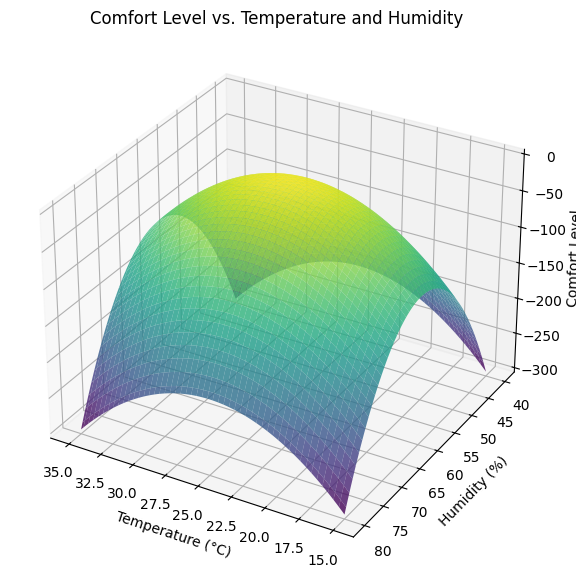

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 定义舒适度函数 (Define the comfort function)
def comfort_function(T, H):
    return -(T - 25)**2 - 0.5 * (H - 60)**2

# 创建数据网格 (Create a data grid)
T_vals = np.linspace(15, 35, 100)
H_vals = np.linspace(40, 80, 100)
T_grid, H_grid = np.meshgrid(T_vals, H_vals)
C_grid = comfort_function(T_grid, H_grid)

# 绘制3D曲面图 (Plot the 3D surface)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T_grid, H_grid, C_grid, cmap='viridis', alpha=0.8)

# 设置图表标签 (Set chart labels)
ax.set_title('Comfort Level vs. Temperature and Humidity ')
ax.set_xlabel('Temperature (°C) ')
ax.set_ylabel('Humidity (%) ')
ax.set_zlabel('Comfort Level ')
ax.view_init(elev=30, azim=120) # 调整视角 (Adjust viewing angle)

plt.show()
plt.close(fig) # 释放内存 (Release memory)

#### 步骤2：动手实验与探索 (Step 2: Hands-on Experiment)

**任务 (Task):** 假设当前湿度 `H` 固定在70%。现在只改变温度 `T`，舒适度会如何变化？
Let's assume the current humidity `H` is fixed at 70%. How does the comfort level change now if we only vary the temperature `T`?

**交互探索 (Interactive Exploration):** 我们使用 `ipywidgets` 创建一个滑块来固定 `H` 的值。当 `H` 固定时，3D曲面被“切”成了一条2D曲线。你可以拖动滑块，观察不同湿度下的“温度-舒适度”曲线。
We'll use `ipywidgets` to create a slider that fixes the value of `H`. When `H` is held constant, the 3D surface is "sliced" into a 2D curve. You can drag the slider to see the "Temperature-Comfort" curve at different fixed humidity levels.

In [5]:
from ipywidgets import interact, FloatSlider

def plot_comfort_slice(fixed_H):
    T_vals = np.linspace(15, 35, 100)
    # H is now a fixed value
    C_vals = comfort_function(T_vals, fixed_H)
    
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.plot(T_vals, C_vals, label=f'Comfort at H={fixed_H:.1f}%')
    
    # 找到并标记最高点 (Find and mark the peak)
    max_comfort_T = T_vals[np.argmax(C_vals)]
    max_comfort_C = np.max(C_vals)
    ax.plot(max_comfort_T, max_comfort_C, 'ro') # 'ro' means red circle
    ax.annotate(f'Peak at T={max_comfort_T:.1f}°C',
                xy=(max_comfort_T, max_comfort_C),
                xytext=(max_comfort_T + 1, max_comfort_C - 10),
                arrowprops=dict(facecolor='black', shrink=0.05))
    
    ax.set_title(f'Comfort vs. Temperature at a Fixed Humidity of {fixed_H:.1f}%')
    ax.set_xlabel('Temperature (°C)')
    ax.set_ylabel('Comfort Level')
    ax.grid(True)
    ax.legend()
    
    plt.show()
    plt.close(fig)

# 创建交互式滑块 (Create the interactive slider)
interact(plot_comfort_slice, fixed_H=FloatSlider(min=40, max=80, step=1, value=70, description='Fixed Humidity'));

interactive(children=(FloatSlider(value=70.0, description='Fixed Humidity', max=80.0, min=40.0, step=1.0), Out…

**观察 (Observation):**
当你固定住湿度 `H` 时，这个多变量问题就退化成了一个我们非常熟悉的单变量求导问题！我们可以轻易地找到这条2D曲线在任意一点的斜率，这个斜率就代表了**在当前湿度下，温度每变化一点点，舒适度会变化多少**。

When you fix the humidity `H`, the multivariable problem degenerates into a single-variable calculus problem we are very familiar with! We can easily find the slope of this 2D curve at any point. This slope represents **how much the comfort level changes for a tiny change in temperature, at the current humidity level**.

#### 步骤3：抽象与定义 (Step 3: Abstraction & Definition)

**顿悟 (The Insight):** 在多变量函数中，当我们**固定其他所有变量，只观察函数对某一个变量的变化率**时，这个变化率就是**偏导数 (Partial Derivative)**。
In a multivariable function, when we **hold all other variables constant and observe the rate of change with respect to just one variable**, this rate of change is the **Partial Derivative**.

**数学定义 (Mathematical Definition):**
舒适度对温度的偏导数，记作 `∂C/∂T` (读作 "partial C partial T")，就是将 `H` 暂时看作一个常数，然后对 `T` 求导。
The partial derivative of Comfort with respect to Temperature, denoted as `∂C/∂T`, is found by treating `H` as a constant and then differentiating with respect to `T`.

$$ C(T, H) = -(T - 25)^2 - 0.5(H - 60)^2 $$

To find `∂C/∂T`, we treat `H` as a constant (let's say `H_0`):
$$ \frac{\partial C}{\partial T} = \frac{\partial}{\partial T} \left[ -(T - 25)^2 - 0.5(H_0 - 60)^2 \right] $$

The second term is just a constant with respect to `T`, so its derivative is zero.
$$ \frac{\partial C}{\partial T} = -2(T - 25) - 0 = -2(T - 25) $$

同理，舒适度对湿度的偏导数 `∂C/∂H`，就是将 `T` 看作常数，对 `H` 求导：
Similarly, to find the partial derivative with respect to Humidity, `∂C/∂H`, we treat `T` as a constant:
$$ \frac{\partial C}{\partial H} = \frac{\partial}{\partial H} \left[ -(\text{const} - 25)^2 - 0.5(H - 60)^2 \right] = -0.5 \cdot 2(H - 60) = -(H - 60) $$

#### 步骤4：引入高效工具 (Step 4: Introducing Efficient Tools)

手动求导很棒，但对于复杂的函数会很繁琐。现在我们引入强大的符号计算工具 `sympy`，它可以完美地执行偏导数运算。
Manual differentiation is great for understanding, but it can be tedious for complex functions. Now, let's introduce the powerful symbolic computation tool `sympy`, which can perform partial differentiation perfectly.

**`sympy` 的 `diff` 函数** 天然支持偏导数。我们只需告诉它要求导的函数和我们感兴趣的变量即可。
**The `diff` function in `sympy`** naturally supports partial derivatives. We just need to provide the function and the variable of interest.

In [6]:
import sympy as sp

# 1. 定义符号变量 (Define symbolic variables)
T, H = sp.symbols('T H')

# 2. 定义符号函数 (Define the symbolic function)
comfort_func_sp = -(T - 25)**2 - 0.5*(H - 60)**2
print(f"原始函数 C(T, H) = {comfort_func_sp}")
print("-"*50)

# 3. 计算对温度的偏导数 (Calculate the partial derivative with respect to T)
dC_dT = sp.diff(comfort_func_sp, T)
print(f"对温度的偏导数 ∂C/∂T 是 (The partial derivative w.r.t. T is): {dC_dT}")

# 4. 计算对湿度的偏导数 (Calculate the partial derivative with respect to H)
dC_dH = sp.diff(comfort_func_sp, H)
print(f"对湿度的偏导数 ∂C/∂H 是 (The partial derivative w.r.t. H is): {dC_dH}")

# 让我们代入一个具体的值来计算 (Let's substitute specific values)
T_val, H_val = 28, 70
dC_dT_val = dC_dT.subs({T: T_val, H: H_val})
dC_dH_val = dC_dH.subs({T: T_val, H: H_val})

print("-"*50)
print(f"在 T={T_val}, H={H_val} 时 (At T={T_val}, H={H_val}):")
print(f"∂C/∂T = {dC_dT_val}. 这意味着，如果此时只增加一点温度，舒适度会下降。 (This means if we slightly increase temperature, comfort will decrease.)")
print(f"∂C/∂H = {dC_dH_val}. 这意味着，如果此时只增加一点湿度，舒适度也会下降。 (This means if we slightly increase humidity, comfort will also decrease.)")

原始函数 C(T, H) = -0.5*(H - 60)**2 - (T - 25)**2
--------------------------------------------------
对温度的偏导数 ∂C/∂T 是 (The partial derivative w.r.t. T is): 50 - 2*T
对湿度的偏导数 ∂C/∂H 是 (The partial derivative w.r.t. H is): 60.0 - 1.0*H
--------------------------------------------------
在 T=28, H=70 时 (At T=28, H=70):
∂C/∂T = -6. 这意味着，如果此时只增加一点温度，舒适度会下降。 (This means if we slightly increase temperature, comfort will decrease.)
∂C/∂H = -10.0000000000000. 这意味着，如果此时只增加一点湿度，舒适度也会下降。 (This means if we slightly increase humidity, comfort will also decrease.)


**解释 (Interpretation):** `sp.diff(func, var)` 完美地执行了偏导数的定义，自动将其他符号变量（如 `H`）视为常数来处理。计算结果 `-2*T + 50` 和 `-H + 60` 与我们手动推导的结果 `-2(T-25)` 和 `-(H-60)` 完全一致。
`sp.diff(func, var)` perfectly executes the definition of a partial derivative, automatically treating other symbolic variables (like `H`) as constants. The results `-2*T + 50` and `-H + 60` are identical to our manually derived results `-2(T-25)` and `-(H-60)`.

---

### 1.2.2 例子2：游戏角色的属性加点
### Example 2: Allocating Attribute Points for a Game Character

**生活场景 (Scenario):** 在一款角色扮演游戏中，角色的战斗力 `P(S, A)` 由力量(S, Strength)和敏捷(A, Agility)共同决定。
In an RPG, a character's Power `P(S, A)` is determined by Strength (S) and Agility (A).

**推理过程 (Reasoning):** 当你获得一个属性点，你需要在加“力量”还是“敏捷”之间做选择。如果你想知道**当前状态下，增加1点力量能带来多少战斗力提升**，你实际上就是在关心战斗力对力量的偏导数 `∂P/∂S`。
When you gain an attribute point, you must choose between increasing Strength or Agility. If you want to know **how much power you gain by adding 1 point to Strength at your current state**, you are essentially interested in the partial derivative of Power with respect to Strength, `∂P/∂S`.

**数学表达式 (Mathematical Expression):**
假设战斗力函数为 (Assume the power function is): $$P(S, A) = 2S^2 + 1.5A^2 + SA$$
这个公式表示力量和敏捷本身对战斗力有二次方的加成，同时两者之间还有协同效应（`SA`项）。
This formula implies that Strength and Agility contribute quadratically to power, and there's also a synergistic effect between them (the `SA` term).

In [9]:
# 定义符号变量和函数 (Define symbolic variables and function)
S, A = sp.symbols('S A')
power_func = 2*S**2 + 1.5*A**2 + S*A

# 计算偏导数 (Calculate partial derivatives)
dP_dS = sp.diff(power_func, S)
dP_dA = sp.diff(power_func, A)

print(f"战斗力函数 P(S, A) = {power_func}")
print(f"对力量的偏导数 ∂P/∂S = {dP_dS}")
print(f"对敏捷的偏导数 ∂P/∂A = {dP_dA}")

# 假设当前角色属性为 S=10, A=12 (Assume current stats are S=10, A=12)
current_S, current_A = 10, 12
dP_dS_val = dP_dS.subs({S: current_S, A: current_A})
dP_dA_val = dP_dA.subs({S: current_S, A: current_A})

print("-"*50)
print(f"当 S={current_S}, A={current_A} 时:")
print(f"∂P/∂S = {dP_dS_val}. 此时增加一点力量，战斗力大约提升 {dP_dS_val}。")
print(f"∂P/∂A = {dP_dA_val}. 此时增加一点敏捷，战斗力大约提升 {dP_dA_val}。")

if dP_dS_val > dP_dA_val:
    print("\n结论：当前加‘力量’的收益更高！(Conclusion: Increasing 'Strength' provides a higher return right now!)")
else:
    print("\n结论：当前加‘敏捷’的收益更高！(Conclusion: Increasing 'Agility' provides a higher return right now!)")

战斗力函数 P(S, A) = 1.5*A**2 + A*S + 2*S**2
对力量的偏导数 ∂P/∂S = A + 4*S
对敏捷的偏导数 ∂P/∂A = 3.0*A + S
--------------------------------------------------
当 S=10, A=12 时:
∂P/∂S = 52. 此时增加一点力量，战斗力大约提升 52。
∂P/∂A = 46.0000000000000. 此时增加一点敏捷，战斗力大约提升 46.0000000000000。

结论：当前加‘力量’的收益更高！(Conclusion: Increasing 'Strength' provides a higher return right now!)


---

### 1.2.3 例子3：在线广告的点击率
### Example 3: Click-Through Rate (CTR) of an Online Ad

**生活场景 (Scenario):** 一个在线广告的点击率 `CTR(T, I)` 由标题吸引力(T, Title attractiveness)和图片质量(I, Image quality)共同决定。T和I都可以量化为0-100的分数。
The Click-Through Rate `CTR(T, I)` of an online ad is determined by the Title's attractiveness (T) and the Image's quality (I). Both T and I can be quantified on a scale of 0-100.

**推理过程 (Reasoning):** 市场营销人员经常做A/B测试。当他们保持图片不变，只测试不同标题时，他们分析的就是点击率对标题吸引力 `T` 的偏导数 `∂CTR/∂T`。
Marketers often conduct A/B tests. When they keep the image the same but test different titles, they are analyzing the partial derivative of CTR with respect to Title attractiveness, `∂CTR/∂T`.

**数学表达式 (Mathematical Expression):**
假设点击率函数为 (Assume the CTR function is): $$CTR(T, I) = 0.01 \cdot T \cdot \ln(I)$$
这个模型假设标题吸引力是线性影响，而图片质量的影响是对数增长的（即图片从很差到一般提升很大，从很好到极好提升有限）。
This model assumes a linear impact from the title's attractiveness and a logarithmic impact from the image quality (i.e., improving a poor image yields a large gain, while improving an already great image yields a smaller gain).

In [10]:
# 定义符号变量和函数 (Define symbolic variables and function)
T, I = sp.symbols('T I')
ctr_func = 0.01 * T * sp.ln(I)

# 计算偏导数 (Calculate partial derivatives)
dCTR_dT = sp.diff(ctr_func, T)
dCTR_dI = sp.diff(ctr_func, I)

print(f"点击率函数 CTR(T, I) = {ctr_func}")
print(f"对标题的偏导数 ∂CTR/∂T = {dCTR_dT}")
print(f"对图片的偏导数 ∂CTR/∂I = {dCTR_dI}")

# 假设当前广告素材评分为 T=70, I=80 (Assume current ad scores are T=70, I=80)
current_T, current_I = 70, 80
dCTR_dT_val = dCTR_dT.subs({T: current_T, I: current_I}).evalf() # .evalf() for numerical result
dCTR_dI_val = dCTR_dI.subs({T: current_T, I: current_I}).evalf()

print("-"*50)
print(f"当 T={current_T}, I={current_I} 时:")
print(f"∂CTR/∂T ≈ {dCTR_dT_val:.4f}. 此时每提升1点标题吸引力，CTR大约增加 {dCTR_dT_val:.4f}。")
print(f"∂CTR/∂I ≈ {dCTR_dI_val:.4f}. 此时每提升1点图片质量，CTR大约增加 {dCTR_dI_val:.4f}。")

print("\n这意味着，如果提升1点标题分和提升1点图片分的成本相同，那么优化标题是更高效的选择。")
print("(This means if the cost to improve the title score by 1 point is the same as for the image, optimizing the title is the more efficient choice.)")

点击率函数 CTR(T, I) = 0.01*T*log(I)
对标题的偏导数 ∂CTR/∂T = 0.01*log(I)
对图片的偏导数 ∂CTR/∂I = 0.01*T/I
--------------------------------------------------
当 T=70, I=80 时:
∂CTR/∂T ≈ 0.0438. 此时每提升1点标题吸引力，CTR大约增加 0.0438。
∂CTR/∂I ≈ 0.0088. 此时每提升1点图片质量，CTR大约增加 0.0088。

这意味着，如果提升1点标题分和提升1点图片分的成本相同，那么优化标题是更高效的选择。
(This means if the cost to improve the title score by 1 point is the same as for the image, optimizing the title is the more efficient choice.)
